<a href="https://colab.research.google.com/github/dolmani38/BLE-signal-collision-simulation/blob/main/simulation_0625.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BLE Signal collision simulation

* 2 signal의 충돌 확률을 고려한다.
* Signal은 5000ms 간격, 2ms 동안 송출
* 2ms 내 3개 channel(37,38,39)로 각 1회 총 3회 순차적 송출 (advertising event)
* 이에 따른 2 signal의 충돌 확률은 2/5000 * (1/1.4)^3 으로 생각 가능
* 여기서 1/1.4는 동일 channel이 충돌할 확률
* 2 signal의 충돌 확률을 a 라고 한다면 

* 3 signal의 충돌은 1,2번 충돌, 1,3번 충돌, 2,3번 충돌, 1,2,3 모두 충돌의 경우의 수를 고려 가능
* 이상의 경우, 3a + a^2 으로 표현 가능
* 여기서 a^2은, 1,2번이 충돌과 여기에 3번이 동시에 충돌될 확률에 해당
* 4 Signal의 경우 같은 맥락으로 6a + 2a^2 + a^3 으로 표현 가능

* 수식 입력 참고 (https://colab.research.google.com/github/datascienceschool/book/blob/master/ds/02%20mathematics/04.01%20%ED%95%A8%EC%88%98.ipynb)

* 참고 논문 (https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=8443321)

## n Signal collision function

2 Signal collision probability

* signal_period (advInterval) = sp
* signal_duration = sd
* channel_variation = cv --> 이걸... 1보다 크다고 볼수 있는가?
* channel_count = cc

* advDelay 가 있는가??

$$
\begin{align}
P_c = \dfrac{sd}{sp} (\dfrac{1}{cv})^{cc}
\tag{1}
\end{align}
$$


n Signal collision fuction

$$
\begin{align}
P_c(n) = \sum_{k=2}^n (k-1)P_c + \sum_{m=2}^n (n-m)P_c^{m}
\tag{2}
\end{align}
$$

In [109]:
# 2 Signal collision probability

signal_period = 5000
signal_duration = 2
channel_variation = 1.4
channel_count = 3

Pc = (signal_duration / signal_period) * (1/channel_variation) ** channel_count

Pc

0.00014577259475218661

In [110]:
from typing import MappingView
def collision_fuction(signal_count=100, default_prob = Pc):
    term1 = 0.0
    term2 = 0.0
    for k in range(2,signal_count+1):
        term1 = term1 + (k-1)*default_prob

    for m in range(2,signal_count+1):
        term2 = term2 + (signal_count - m)*default_prob**m

    return term1 + term2


In [111]:
import matplotlib.pyplot as plt

def collision_simulation(signal_count=100, default_prob = Pc):
    collision = []
    collision.append(0.0)
    collision.append(0.0)
    for i in range(2,signal_count):
        c = collision_fuction(signal_count=i)
        if (c < signal_count):
            collision.append(c)
        else:
            print(f"{i}개 운영의 경우, {collision[-1]:.4f}개의 충돌 예측. 즉, 상시 충돌 상황.")
            break

    print(f"{signal_count}개 운영의 경우, {collision[-1]:.4f}개의 충돌 예측. 충돌 확률 {(collision[-1]*100)/signal_count:.4f}%")
    plt.plot(collision)

100개 운영의 경우, 0.7071개의 충돌 예측. 충돌 확률 0.7071%


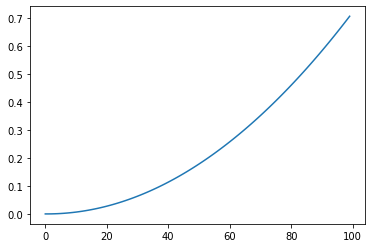

In [112]:

collision_simulation(signal_count=100)


500개 운영의 경우, 18.1124개의 충돌 예측. 충돌 확률 3.6225%


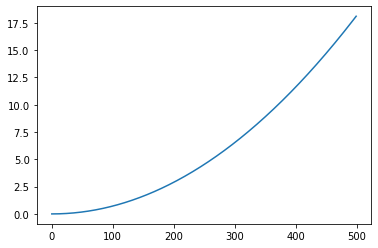

In [113]:

collision_simulation(signal_count=500)

1000개 운영의 경우, 72.6678개의 충돌 예측. 충돌 확률 7.2668%


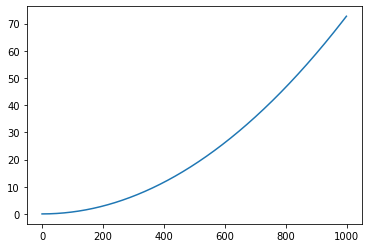

In [114]:
collision_simulation(signal_count=1000)

2000개 운영의 경우, 291.1081개의 충돌 예측. 충돌 확률 14.5554%


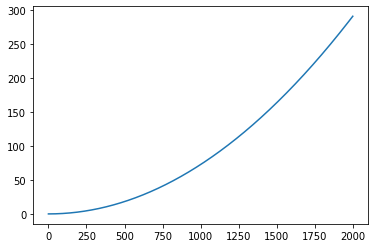

In [100]:
collision_simulation(signal_count=2000)

5000개 운영의 경우, 1821.0644개의 충돌 예측. 충돌 확률 36.4213%


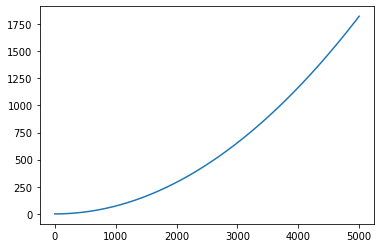

In [101]:
collision_simulation(signal_count=5000)

10000개 운영의 경우, 7286.4435개의 충돌 예측. 충돌 확률 72.8644%


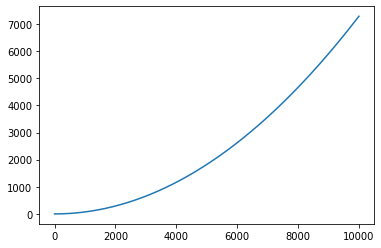

In [102]:
collision_simulation(signal_count=10000)

16566개 운영의 경우, 19998.7365개의 충돌 예측. 즉, 상시 충돌 상황.
20000개 운영의 경우, 19998.7365개의 충돌 예측. 충돌 확률 99.9937%


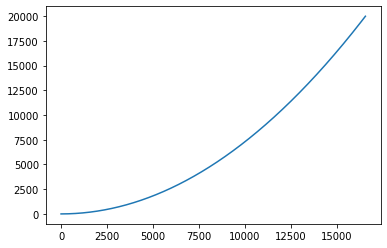

In [103]:
collision_simulation(signal_count=20000)

# Poisson distribution model

* 참고 논문 (https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=8443321)

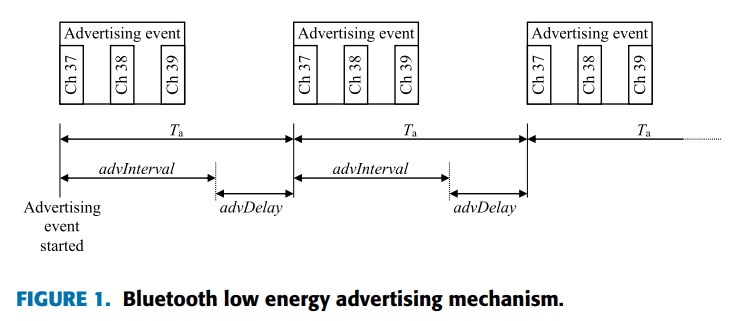

## IV. BLUETOOTH LOW ENERGY COLLISION ANALYSIS
In this section, we analyze the probability of packet collisions. In order to do the collision analysis, we initially
make a number of assumptions as follows: <br>
    1. advertising nodes attempt to transmit according to a Poisson distribution;<br>
    2. advDelay is considered constant (as expectation of random delays); <br>
    3. advertising channel packet duration (dp) for all three advertising channels (channel index = 37, 38, 39) is fixed; <br>
    4. the time duration that an advertiser requires to change its channel (dg) is constant; <br>
    5. for simulation, we did not consider any distortions from the channel; <br>
    6. any number of packets that collide in one time interval is considered one collision.<br>


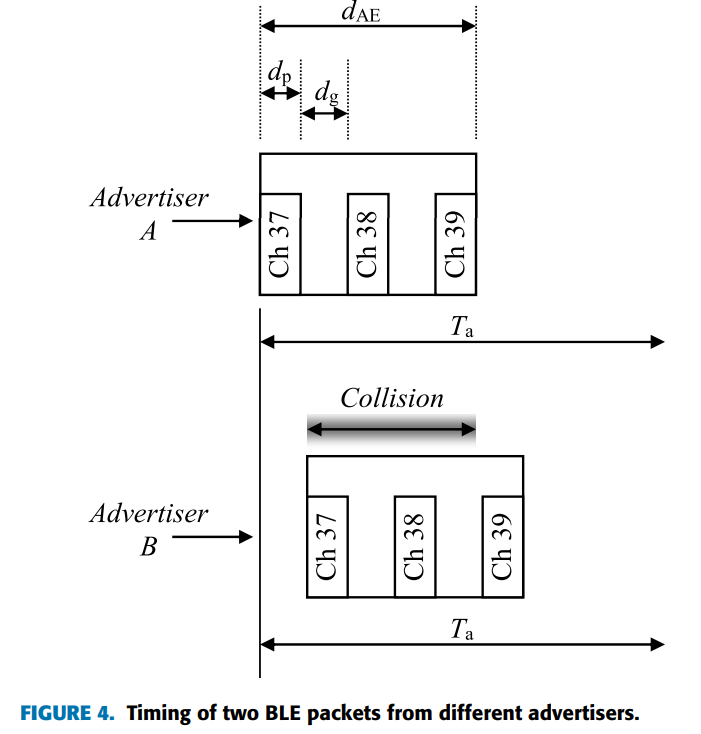

## Poisson distribution model

$$
\begin{align}
P_c(n) = 1 - e^{-n \lambda 2d_p }
\tag{3}
\end{align}
$$

\begin{align}
\lambda = \dfrac{1}{advInterval + advDelay}
\tag{4}
\end{align}

* 근데, 왜 2 dp ???
* -n * lambda * 2 * dp 에서 - 의 이유???

In [236]:
sys.float_info.epsilon

2.220446049250313e-16

In [318]:
# Poisson distribution model

import sys


advInterval =5000
advDelay = 1
lambda1 = 1/(advInterval+advDelay)

# https://infocenter.nordicsemi.com/index.jsp?topic=%2Fsds_s140%2FSDS%2Fs1xx%2Fble_processor_avail_interrupt_latency%2Fble_broadcaster_performance.html
# advertising 175us ???
dp = 0.012  # 12us

def poisson_function(node_count=100):
    return  1-sys.float_info.epsilon**(node_count * lambda1 * 2 * dp)

In [319]:

def collision_simulation2(signal_count=100, default_prob = Pc):
    collision = []
    #collision.append(0.0)
    #collision.append(0.0)
    for i in range(0,signal_count):
        c = poisson_function(node_count=i)
        if (c < signal_count):
            collision.append(c)
        else:
            print(f"{i}개 운영의 경우, {collision[-1]:.4f}개의 충돌 예측. 즉, 상시 충돌 상황.")
            break

    print(f"{signal_count}개 운영의 경우, {collision[-1]*i:.4f}개의 충돌 예측. 충돌 확률 {collision[-1]*100:.4f}%")
    plt.plot(collision)

100개 운영의 경우, 1.6809개의 충돌 예측. 충돌 확률 1.6979%


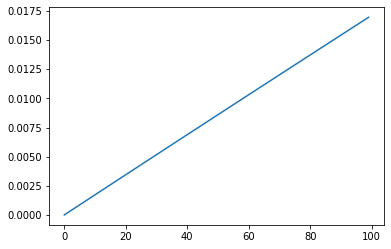

In [320]:
collision_simulation2(signal_count=100)

500개 운영의 경우, 41.2645개의 충돌 예측. 충돌 확률 8.2694%


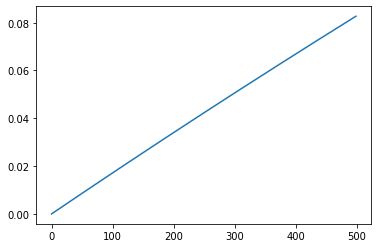

In [321]:
collision_simulation2(signal_count=500)

1000개 운영의 경우, 158.5371개의 충돌 예측. 충돌 확률 15.8696%


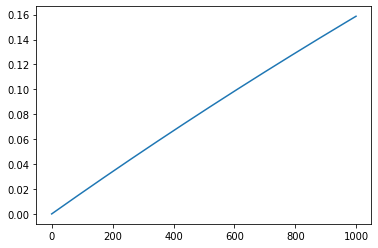

In [322]:
collision_simulation2(signal_count=1000)

2000개 운영의 경우, 584.3670개의 충돌 예측. 충돌 확률 29.2330%


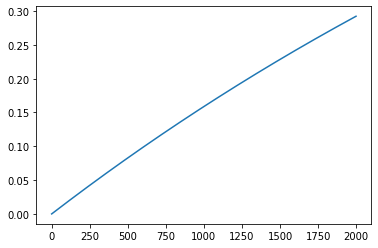

In [323]:
collision_simulation2(signal_count=2000)


10000개 운영의 경우, 8225.5822개의 충돌 예측. 충돌 확률 82.2640%


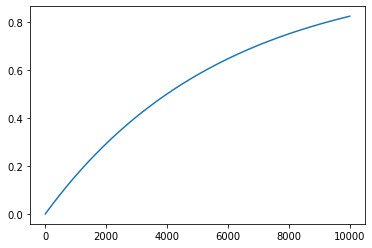

In [324]:
collision_simulation2(signal_count=10000)

20000개 운영의 경우, 19370.0123개의 충돌 예측. 충돌 확률 96.8549%


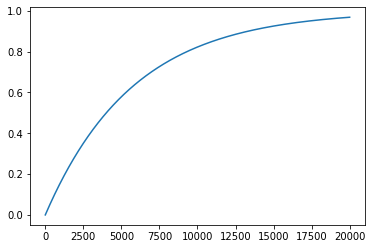

In [325]:
collision_simulation2(signal_count=20000)